# 02. Neural Network Classification with PyTorch Exercises

Resources: https://www.learnpytorch.io/02_pytorch_classification/

In [182]:
# Import torch
import torch
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "mps"
print(device)

# Setup random seed
RANDOM_SEED = 42

2.7.1
mps


## 1. Make a binary classification dataset with Scikit-Learn's `make_moons()` function

- For consistency, the dataset should have 1000 samples and a random_state=42.
- Turn the data into PyTorch tensors.
- Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [183]:
# Create a dataset with scikit-learn's make_moons()
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(
    n_samples=1000,
    noise=0.05,
    random_state=RANDOM_SEED,
)

X_moons[:5], y_moons[:5]

(array([[-0.02137124,  0.40618608],
        [ 0.97670045, -0.45832306],
        [ 0.90405882, -0.37651952],
        [ 0.37736316, -0.39703717],
        [-0.84192557,  0.53058695]]),
 array([1, 1, 1, 1, 0]))

In [184]:
# Turn data into a DataFrame
import pandas as pd

moons_df = pd.DataFrame({"x1": X_moons[:, 0], "x2": X_moons[:, 1], "y": y_moons})

moons_df.head(10)

,x1,x2,y
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1
2,0.904059,-0.376520,1
3,0.377363,-0.397037,1
4,-0.841926,0.530587,0
5,0.589303,-0.321376,1
6,0.292487,-0.206963,1
7,-0.026378,0.447663,1
8,1.620141,-0.287589,1
9,0.682467,0.807121,0


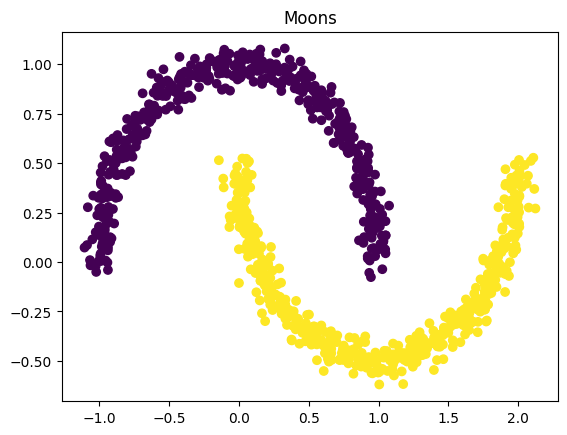

In [185]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.title("Moons")
plt.scatter(
    x=moons_df.x1, 
    y=moons_df.x2,
    c=moons_df.y
)
plt.show()

In [186]:
# Turn data into tensors of dtype float
X_tensor = torch.from_numpy(X_moons).to(torch.float).to(device)
y_tensor = torch.from_numpy(y_moons).to(torch.float).to(device)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=RANDOM_SEED)

In [187]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1

- Feel free to use any combination of PyTorch layers (linear and non-linear) you want

In [188]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=1)
        
        self.relu = nn.ReLU()

    def forward(self, x):
        ## Your code here ##
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# Instantiate the model
model_0 = MoonModelV0().to(device)

In [189]:
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [190]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.7014, -0.1289],
                      [-0.0677, -0.2085],
                      [ 0.6497, -0.1543],
                      [ 0.4543,  0.1752],
                      [-0.5969,  0.1662],
                      [ 0.5860, -0.4625],
                      [-0.4571,  0.6922],
                      [ 0.5682, -0.3945],
                      [ 0.4255, -0.0905],
                      [-0.6972,  0.0531],
                      [ 0.2285, -0.2121],
                      [ 0.2460, -0.6046],
                      [ 0.4900,  0.6028],
                      [ 0.3899,  0.1198],
                      [ 0.2329, -0.5116],
                      [-0.1767, -0.0675]], device='mps:0')),
             ('layer_1.bias',
              tensor([-0.3935, -0.5223,  0.4756,  0.4799, -0.6422,  0.2250,  0.2877,  0.6717,
                       0.4091,  0.6501, -0.2315,  0.4952,  0.5752, -0.6677, -0.5676,  0.1431],
                     device='mps:0')),
             ('laye

In [191]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.7014, -0.1289],
         [-0.0677, -0.2085],
         [ 0.6497, -0.1543],
         [ 0.4543,  0.1752],
         [-0.5969,  0.1662],
         [ 0.5860, -0.4625],
         [-0.4571,  0.6922],
         [ 0.5682, -0.3945],
         [ 0.4255, -0.0905],
         [-0.6972,  0.0531],
         [ 0.2285, -0.2121],
         [ 0.2460, -0.6046],
         [ 0.4900,  0.6028],
         [ 0.3899,  0.1198],
         [ 0.2329, -0.5116],
         [-0.1767, -0.0675]], device='mps:0', requires_grad=True),
 Parameter containing:
 tensor([-0.3935, -0.5223,  0.4756,  0.4799, -0.6422,  0.2250,  0.2877,  0.6717,
          0.4091,  0.6501, -0.2315,  0.4952,  0.5752, -0.6677, -0.5676,  0.1431],
        device='mps:0', requires_grad=True),
 Parameter containing:
 tensor([[ 1.3651e-01, -1.2420e-01,  2.7534e-02, -3.6293e-04,  6.3277e-02,
          -1.3434e-01,  1.4101e-01,  1.6625e-01, -1.7346e-01,  2.4219e-03,
           6.9365e-04,  8.0279e-02,  2.3290e-01,  7.3316e-02, -5.6805e-

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2

In [192]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)

In [193]:
loss_fn, optimizer

(BCEWithLogitsLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1

Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.

- To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
- Train the model for long enough for it to reach over 96% accuracy.
- The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [194]:
# What's coming out of our model?
model_0.eval()

with torch.inference_mode():
    logits_tmp = model_0(X_train)
# logits (raw outputs of model)
print(f"Logits: {logits_tmp[:5].squeeze()}")

pred_probs_tmp = torch.sigmoid(logits_tmp)
# Prediction probabilities
print(f"Pred probs: {pred_probs_tmp[:5].squeeze()}")

pred_labels_tmp = torch.round(pred_probs_tmp)
# Prediction labels
print(f"Pred labels: {pred_labels_tmp[:5].squeeze()}")

Logits: tensor([ 0.0098,  0.0235, -0.0079, -0.0038,  0.0352], device='mps:0')
Pred probs: tensor([0.5024, 0.5059, 0.4980, 0.4990, 0.5088], device='mps:0')
Pred labels: tensor([1., 1., 0., 0., 1.], device='mps:0')


In [195]:
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [196]:
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()
  
  # 1. Forward pass (logits output)
  logits = model_0(X_train).squeeze()
  
  # Turn logits into prediction probabilities
  pred_probs = torch.sigmoid(logits)

  # Turn prediction probabilities into prediction labels
  pred_labels = torch.round(pred_probs)

  # 2. Calculaute the loss
  loss = loss_fn(logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(pred_labels, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()
  
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  optimizer.step()

  ### Testing
  model_0.eval() 
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_0(X_test).squeeze()
    
    # Turn the test logits into prediction labels
    test_pred_labels = torch.round(torch.sigmoid(test_logits))

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred_labels, y_test.int())

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")
     

Epoch: 0 | Loss: 0.6895 | Acc: 0.60% | Test loss: 0.6851 | Test acc: 0.65%
Epoch: 100 | Loss: 0.2810 | Acc: 0.86% | Test loss: 0.2903 | Test acc: 0.85%
Epoch: 200 | Loss: 0.2375 | Acc: 0.89% | Test loss: 0.2358 | Test acc: 0.89%
Epoch: 300 | Loss: 0.2218 | Acc: 0.89% | Test loss: 0.2168 | Test acc: 0.91%
Epoch: 400 | Loss: 0.1989 | Acc: 0.90% | Test loss: 0.1921 | Test acc: 0.92%
Epoch: 500 | Loss: 0.1603 | Acc: 0.93% | Test loss: 0.1530 | Test acc: 0.94%
Epoch: 600 | Loss: 0.1106 | Acc: 0.95% | Test loss: 0.1036 | Test acc: 0.98%
Epoch: 700 | Loss: 0.0690 | Acc: 0.99% | Test loss: 0.0629 | Test acc: 0.99%
Epoch: 800 | Loss: 0.0435 | Acc: 1.00% | Test loss: 0.0384 | Test acc: 1.00%
Epoch: 900 | Loss: 0.0295 | Acc: 1.00% | Test loss: 0.0252 | Test acc: 1.00%


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook

In [197]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

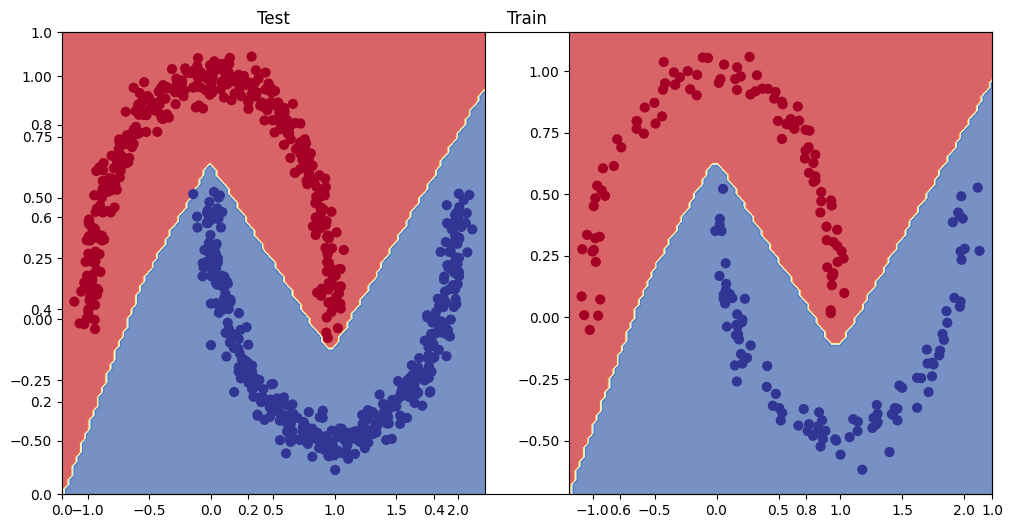

In [198]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))

plt.title("Train")
plt.subplot(1, 2, 1)
plot_decision_boundary(model_0, X_train, y_train)

plt.title("Test")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_0, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch

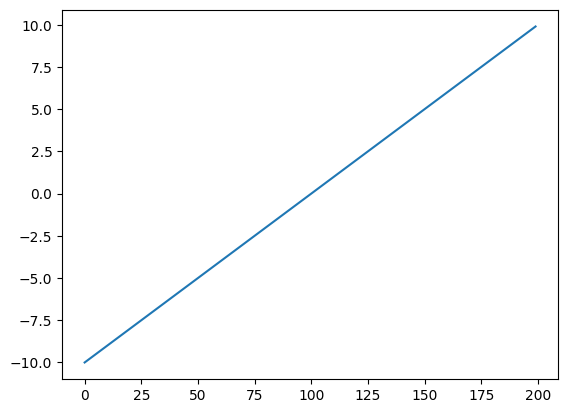

In [199]:
# Create a straight line tensor
tensor = torch.arange(start=-10, end=10, step=0.1)

plt.plot(tensor)
plt.show()

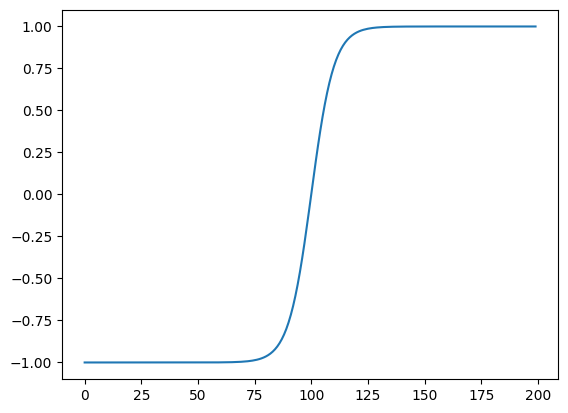

In [200]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(tensor))
plt.show()

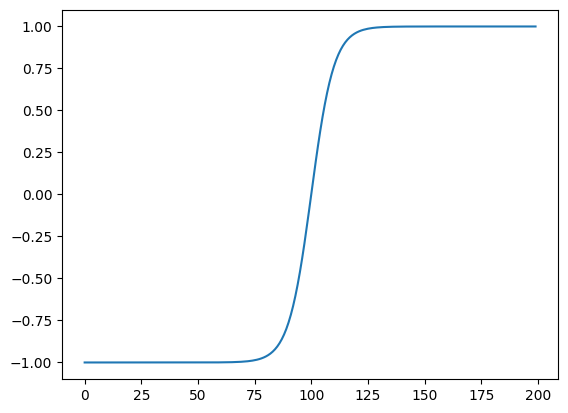

In [201]:
# Replicate torch.tanh() and plot it
def tanh(z: torch.Tensor) -> torch.Tensor:
    return (torch.exp(z) - torch.exp(-z)) / (torch.exp(z) + torch.exp(-z))

plt.plot(tanh(tensor))
plt.show()

## 7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code)

- Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
- Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
- Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
- Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
- Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

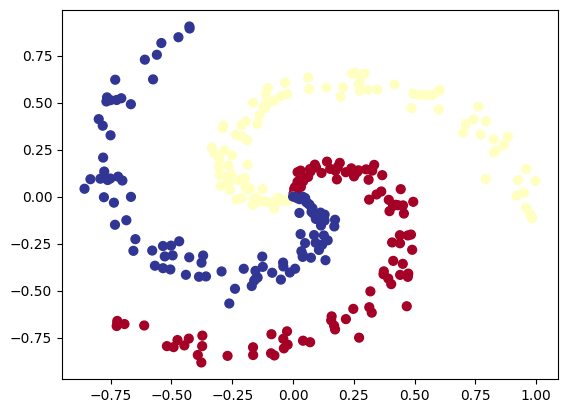

In [202]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()   

In [203]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

len(X_train), len(y_train), len(X_test), len(y_test)

(240, 240, 60, 60)

In [204]:
X_train[:5], y_train[:5]

(tensor([[ 0.0396, -0.3208],
         [ 0.3179, -0.5041],
         [ 0.0321,  0.0514],
         [ 0.8259,  0.2347],
         [ 0.4942,  0.5472]]),
 tensor([2, 0, 0, 1, 1]))

In [205]:
# Let's calculuate the accuracy for when we fit our model
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn     

MulticlassAccuracy()

In [206]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "mps"

# Create model by subclassing nn.Module
class SpiralModelV0(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2, out_features=32)
        self.layer_2 = nn.Linear(in_features=32, out_features=32)
        self.layer_3 = nn.Linear(in_features=32, out_features=3)
        
        self.relu = nn.ReLU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# Instantiate model and send it to device
model_1 = SpiralModelV0().to(device)
model_1

SpiralModelV0(
  (layer_1): Linear(in_features=2, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
)

In [207]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230],
                      [ 0.1900, -0.1918],
                      [ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
  

In [208]:
list(model_1.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802],
         [-0.3258, -0.0829],
         [-0.2872,  0.4691],
         [-0.5582, -0.3260],
         [-0.1997, -0.4252],
         [ 0.0667, -0.6984],
         [ 0.6386, -0.6007],
         [ 0.5459,  0.1177],
         [-0.2296,  0.4370],
         [ 0.1102,  0.5713],
         [ 0.0773, -0.2230],
         [ 0.1900, -0.1918],
         [ 0.2976,  0.6313],
         [ 0.4087, -0.3091],
         [ 0.4082,  0.1265],
         [ 0.3591, -0.4310],
         [-0.7000, -0.2732],
         [-0.5424,  0.5802],
         [ 0.2037,  0.2929],
         [ 0.2236, -0.0123],
         [ 0.5534, -0.5024],
         [ 0.0445, -0.4826],
         [ 0.2180, -0.2435]], device='mps:0', requires_grad=True),
 Parameter 

In [209]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

model_1.eval()
with torch.inference_mode():
    logits_tmp = model_1(X_train)

# Print out first 10 untrained model outputs (forward pass)
print(f"Logits: {logits_tmp[:10]}")

pred_probs_tmp = torch.softmax(logits_tmp, dim=1)
print(f"Pred probs: {pred_probs_tmp[:10]}")

pred_labels_tmp = torch.argmax(pred_probs_tmp, dim=1)
print(f"Pred labels: {pred_labels_tmp[:10]}")
     

Logits: tensor([[-0.1189,  0.0771, -0.0033],
        [-0.1334,  0.0795, -0.0144],
        [-0.1263,  0.0710,  0.0171],
        [-0.1331,  0.1013,  0.0378],
        [-0.1205,  0.1008,  0.0514],
        [-0.1359,  0.0686,  0.0275],
        [-0.1330,  0.0683,  0.0243],
        [-0.1141,  0.0690,  0.0089],
        [-0.1394,  0.0786,  0.0042],
        [-0.1323,  0.1019,  0.0379]], device='mps:0')
Pred probs: tensor([[0.2995, 0.3643, 0.3362],
        [0.2973, 0.3678, 0.3349],
        [0.2965, 0.3612, 0.3423],
        [0.2898, 0.3664, 0.3438],
        [0.2911, 0.3632, 0.3457],
        [0.2937, 0.3604, 0.3459],
        [0.2947, 0.3604, 0.3449],
        [0.3001, 0.3604, 0.3394],
        [0.2943, 0.3660, 0.3397],
        [0.2899, 0.3664, 0.3437]], device='mps:0')
Pred labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='mps:0')


In [210]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    params=model_1.parameters(),
    lr=0.1
)

loss_fn, optimizer

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     decoupled_weight_decay: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     weight_decay: 0
 ))

In [211]:
# Build a training loop for the model
epochs = 1000

# Loop over data
for epoch in range(epochs):
  ## Training
  model_1.train()

  # 1. Forward pass
  logits = model_1(X_train)
  pred_probs = torch.softmax(logits, dim=1)
  pred_labels = torch.argmax(pred_probs, dim=1)

  # 2. Calculate the loss
  loss = loss_fn(logits, y_train)
  acc = acc_fn(pred_labels, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred_probs = torch.softmax(test_logits, dim=1)
    test_pred_labels = torch.argmax(test_pred_probs, dim=1)
    
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred_labels, y_test)
    
  # Print out what's happening every 100 epochs
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss {loss:.4f} | Accuracy: {acc:.2f}% | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss 1.1040 | Accuracy: 0.35% | Test loss: 1.0092 | Test accuracy: 0.48%
Epoch: 100 | Loss 0.0218 | Accuracy: 0.99% | Test loss: 0.0015 | Test accuracy: 1.00%
Epoch: 200 | Loss 0.0168 | Accuracy: 0.99% | Test loss: 0.0001 | Test accuracy: 1.00%
Epoch: 300 | Loss 0.0152 | Accuracy: 0.99% | Test loss: 0.0000 | Test accuracy: 1.00%
Epoch: 400 | Loss 0.0150 | Accuracy: 0.99% | Test loss: 0.0000 | Test accuracy: 1.00%
Epoch: 500 | Loss 0.0144 | Accuracy: 0.99% | Test loss: 0.0000 | Test accuracy: 1.00%
Epoch: 600 | Loss 0.0144 | Accuracy: 0.99% | Test loss: 0.0000 | Test accuracy: 1.00%
Epoch: 700 | Loss 0.0146 | Accuracy: 0.99% | Test loss: 0.0000 | Test accuracy: 1.00%
Epoch: 800 | Loss 0.0144 | Accuracy: 0.99% | Test loss: 0.0000 | Test accuracy: 1.00%
Epoch: 900 | Loss 0.0142 | Accuracy: 0.99% | Test loss: 0.0000 | Test accuracy: 1.00%


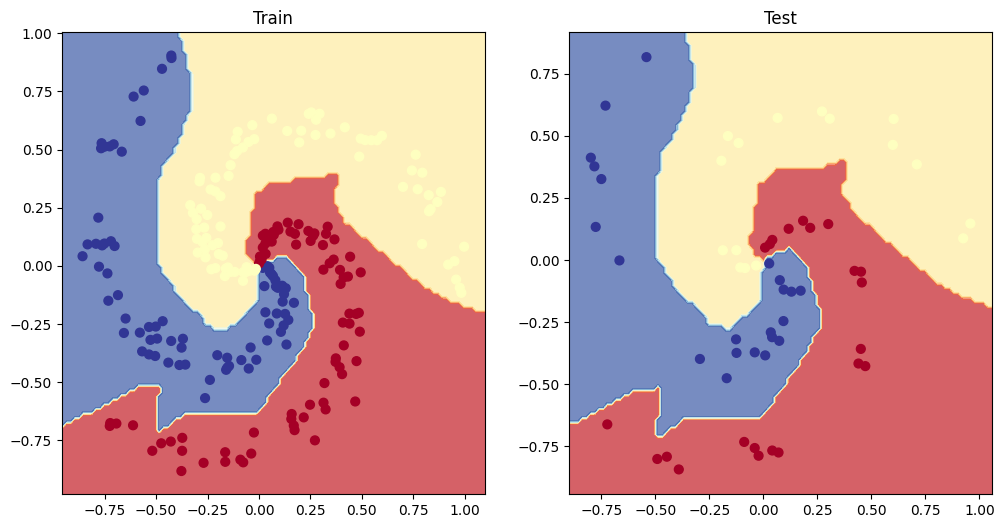

In [212]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")

plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)